In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [4]:
y=dataset['Purchased']
y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64>

In [5]:
x=dataset.drop('Purchased', axis=1)
x.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary
0    15624510    Male   19            19000
1    15810944    Male   35            20000
2    15668575  Female   26            43000
3    15603246  Female   27            57000
4    15804002    Male   19            76000
..        ...     ...  ...              ...
395  15691863  Female   46            41000
396  15706071    Male   51            23000
397  15654296  Female   50            20000
398  15755018    Male   36            33000
399  15594041  Female   49            36000

[400 rows x 4 columns]>

In [6]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)
x_test.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary
332  15769902    Male   42            65000
111  15660200  Female   37            71000
352  15587419  Female   42            90000
205  15766609  Female   47            47000
56   15775562  Female   23            48000
..        ...     ...  ...              ...
76   15746737    Male   18            52000
340  15588080  Female   53           104000
34   15724858    Male   27            90000
181  15774727  Female   31            71000
80   15595917    Male   30            80000

[100 rows x 4 columns]>

In [8]:
reg=LogisticRegression(C=0.01,random_state=0)
reg.fit(x_train,y_train)

ValueError: could not convert string to float: 'Female'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [15]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [16]:
dataset=dataset.drop('User ID',axis=1)
dataset.head

<bound method NDFrame.head of      Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]>

In [17]:
# We have use one hot encoding here to convert the data in the string into int format.
# The thing which happens is the column for gender is split into two on the basis of values in iter
dataset=pd.get_dummies(dataset,columns=["Gender"])
dataset.head

<bound method NDFrame.head of      Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0     19            19000          0              0            1
1     35            20000          0              0            1
2     26            43000          0              1            0
3     27            57000          0              1            0
4     19            76000          0              0            1
..   ...              ...        ...            ...          ...
395   46            41000          1              1            0
396   51            23000          1              0            1
397   50            20000          1              1            0
398   36            33000          0              0            1
399   49            36000          1              1            0

[400 rows x 5 columns]>

In [19]:
dataset.isnull().sum()



Age                0
EstimatedSalary    0
Purchased          0
Gender_Female      0
Gender_Male        0
dtype: int64

In [22]:
dataset.describe()
y=dataset["Purchased"]
x=dataset.drop("Purchased",axis=1)
y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64>

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)
x_test.head

<bound method NDFrame.head of      Age  EstimatedSalary  Gender_Female  Gender_Male
332   42            65000              0            1
111   37            71000              1            0
352   42            90000              1            0
205   47            47000              1            0
56    23            48000              1            0
..   ...              ...            ...          ...
76    18            52000              0            1
340   53           104000              1            0
34    27            90000              0            1
181   31            71000              1            0
80    30            80000              0            1

[100 rows x 4 columns]>

In [26]:
# As some of the colums have there value range under 10 we will make the range for remaining ones also in the similar range
x_train["Age"]=pd.cut(x_train["Age"],bins=5,labels=False)
x_train["Age"].head

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<bound method NDFrame.head of 57     0
87     0
357    2
355    4
238    2
      ..
369    4
320    4
15     0
125    2
265    2
Name: Age, Length: 300, dtype: int64>

In [28]:
# Now we do the same for the salary column as well
x_train["EstimatedSalary"]=pd.cut(x_train["EstimatedSalary"],bins=5,labels=False)
x_train["EstimatedSalary"].head

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<bound method NDFrame.head of 57     2
87     2
357    2
355    0
238    2
      ..
369    0
320    4
15     2
125    1
265    3
Name: EstimatedSalary, Length: 300, dtype: int64>

In [29]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [30]:
# Now chaning the colums for the testing data as well
x_test["Age"]=pd.cut(x_test["Age"],bins=3,labels=False)
x_test["EstimatedSalary"]=pd.cut(x_test["EstimatedSalary"],bins=10,labels=False)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
x_test.head

<bound method NDFrame.head of      Age  EstimatedSalary  Gender_Female  Gender_Male
332    1                3              0            1
111    1                4              1            0
352    1                5              1            0
205    2                2              1            0
56     0                2              1            0
..   ...              ...            ...          ...
76     0                2              0            1
340    2                6              1            0
34     0                5              0            1
181    0                4              1            0
80     0                4              0            1

[100 rows x 4 columns]>

In [33]:
x_test.reset_index(inplace=True)
x_test.head

<bound method NDFrame.head of     level_0  index  Age  EstimatedSalary  Gender_Female  Gender_Male
0         0    332    1                3              0            1
1         1    111    1                4              1            0
2         2    352    1                5              1            0
3         3    205    2                2              1            0
4         4     56    0                2              1            0
..      ...    ...  ...              ...            ...          ...
95       95     76    0                2              0            1
96       96    340    2                6              1            0
97       97     34    0                5              0            1
98       98    181    0                4              1            0
99       99     80    0                4              0            1

[100 rows x 6 columns]>

In [36]:
y_predict=reg.predict(x_test.drop(["level_0","index"],axis=1))
y_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [37]:
y_test

332    0
111    0
352    1
205    0
56     0
      ..
76     0
340    1
34     0
181    0
80     0
Name: Purchased, Length: 100, dtype: int64

In [40]:
# Finding the accuracy score between the predicted and tested dataset
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.81

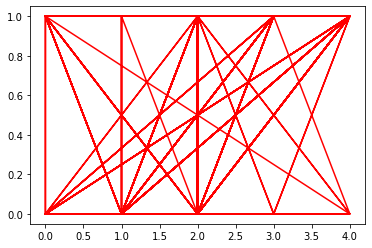

In [50]:
plt.plot(dataset["EstimatedSalary"],dataset["Purchased"],'r')
plt.show()

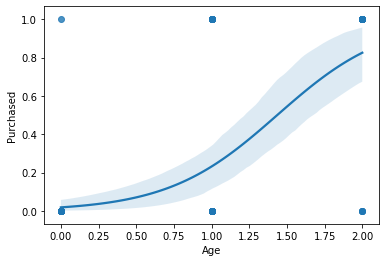

In [55]:
import seaborn as sns
sns.regplot(x_test["Age"],y_test,data=dataset,logistic=True)

In [56]:
# We can evaluate the performance of our model using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict,y_test)
# the output which we get from confusion matrix is 2x2 as we have 2 variable 0 & 1
# The diagonal values represent the correct predictions

array([[60, 10],
       [ 9, 21]])